In [1]:
import sys
import os
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [3]:
import NbrRegionSegment as seg


In [4]:
img = cv.imread("3.jpg")

In [5]:
# img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

In [6]:
# img = cv.medianBlur(img, 3)

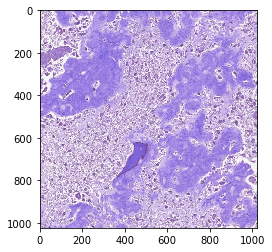

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [9]:
#LBP part
radius = 1
points = 8*radius 

lbp = local_binary_pattern(gray_img, points, radius, "uniform").astype("uint8")

print(lbp)

[[3 0 2 ... 4 3 1]
 [4 1 3 ... 5 4 2]
 [4 9 6 ... 5 3 1]
 ...
 [5 1 3 ... 5 5 3]
 [5 1 3 ... 5 5 2]
 [2 1 3 ... 9 1 0]]


In [10]:
# r1, r2 = seg.RegionExtract(img, lbp, 20, 0.2, True)
r = seg.RegionExtract(img, lbp, 1, 0.2, True)

# print(r1.shape, r2.shape)
# plt.imshow(r)
# plt.imshow(r2)

Time to segment =  2.3818838596343994


In [11]:
r1, r2 = r

In [12]:
seg.GetIntraSegVariance(gray_img, r1, r2.shape[0], True)

Time to Calculate =  0.016997575759887695


8.567174518248066e-06

In [13]:
res = []

for i in range(1, 25, 5):
    r1, r2 = seg.RegionExtract(img, lbp, i, 0.2, True)
    res.append(seg.GetIntraSegVariance(gray_img, r1, r2.shape[0], True))

Time to segment =  2.1793503761291504


ValueError: Buffer has wrong number of dimensions (expected 2, got 3)

In [ ]:
plt.plot(range(1, 25, 5), res)